# Paria Rezayan 
# Image Classification of the Fashion MNIST dataset in Python using TensorFlow Keras

This project showcases how to classify images from the Fashion MNIST dataset using Python and TensorFlow Keras.

# Importing Libraries

First, I need to import the necessary libraries which are numpy, matplotlib, tensorflow, sklearn, and tensorflow_datasets.

In [ ]:
# importing the necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import tensorflow_datasets as tfds
from sklearn.model_selection import train_test_split
import random

# Loading the Dataset

Then, the Fashion MNIST dataset is loaded and converted into numpy arrays for further processing. I will also be spliting the dataset into training and testing sets.

In [3]:
# loading the fashion_mnist dataset
data, info = tfds.load('fashion_mnist', split='train', with_info=True, as_supervised=True)

# converting dataset to numpy arrays
X = []
y = []
for img, label in data:
    X.append(img.numpy())
    y.append(label.numpy())

In [4]:
# splitting the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Exploring the Data

The subsequent step entails exploring the data by printing out the shape of the training set and the first element of the training set, as well as getting the labels and randomly printing out 10 training images.

In [5]:
# exploring the data
print ('The shape of X_train is: ', len(X_train))
print ('The shape of y_train is: ', len(y_train))

The shape of X_train is:  48000
The shape of y_train is:  48000


In [6]:
print('The first element of X_train is: ', X_train[0])

The first element of X_train is:  [[[  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  2]
  [  3]
  [  0]
  [  2]
  [ 40]
  [ 26]
  [ 20]
  [ 27]
  [ 39]
  [  0]
  [  0]
  [  3]
  [  2]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]]

 [[  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  4]
  [  0]
  [  0]
  [  0]
  [  0]
  [ 35]
  [108]
  [130]
  [ 69]
  [146]
  [184]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  4]
  [  1]
  [  0]
  [  0]
  [  0]
  [  0]]

 [[  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [ 64]
  [177]
  [ 50]
  [ 56]
  [192]
  [173]
  [217]
  [ 61]
  [ 14]
  [171]
  [ 37]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]]

 [[  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [153]
  [205]
  [227]
  [239]
  [ 92]
  [  0]
  [137]
  [215]
  [184]
  [  0]
  [ 45]
  [255]
  [212]
  [185]
  [131]
  [  7]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]]

 [[  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [196]
  [235

In [7]:
# getting the labels 
unique_values = list(set(y_train))
print(unique_values)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


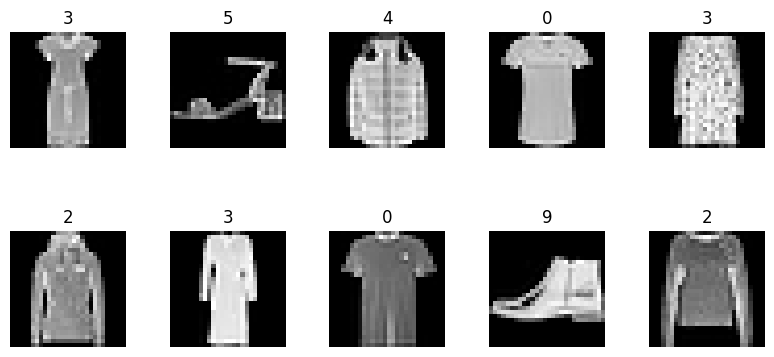

In [8]:
# randomly printing out 10 training images 

num_images = 10
fig, axes = plt.subplots(2, 5, figsize=(8, 4))
fig.tight_layout(pad=0.1)
for i, ax in enumerate(axes.flat):
    random_index = random.randint(0, len(X_train) - 1)
    ax.imshow(X_train[random_index], cmap='gray')
    ax.set_title(y_train[random_index])
    ax.axis('off')
    if i + 1 == num_images:
        break

plt.show()

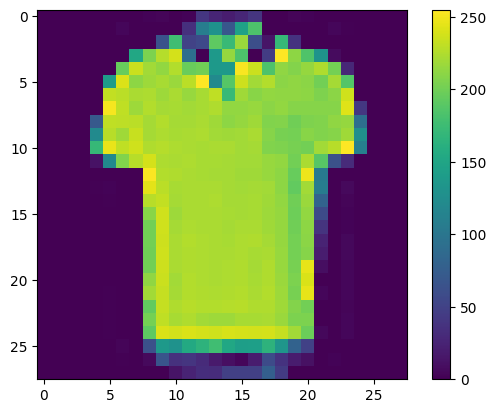

In [9]:
# printting the first image to get the range of pixel values 
fig, ax = plt.subplots()
ax.imshow(X_train[0])
plt.colorbar(ax.imshow(X_train[0]), ax=ax)
ax.grid(False)
plt.show()

# Preprocessing the Data

Before building the model, I need to preprocess the data by scaling the pixel values between 0 and 1.

In [13]:
# preprocessing 
X_train = np.array(X_train)
y_train = np.array(y_train)
X_train = X_train / 255.0
y_train = y_train / 255.0

# Building the Model

I will be using a sequential model with two dense layers: one with 128 neurons and relu activation function and another with 10 neurons and softmax activation function.

In [14]:
# building the model 
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation= "relu"),
    keras.layers.Dense(10, activation= "softmax")
])

In [15]:
# printting a summary of the network's architecture
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               100480    
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


# Compiling the Model

Next, I will compile the model with adam optimizer, sparse_categorical_crossentropy loss function, and accuracy metric.

In [16]:
# compiling the model
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Training the Model

Afterwards, the model is trained on the training set with 10 epochs:

In [17]:
# fitting the model
model.fit(X_train, y_train, epochs=10)

Epoch 1/10
1500/1500 [==============================] - 10s 3ms/step - loss: 0.0845 - accuracy: 0.0991
Epoch 2/10
1500/1500 [==============================] - 4s 2ms/step - loss: 2.9631e-04 - accuracy: 0.0991
Epoch 3/10
1500/1500 [==============================] - 4s 3ms/step - loss: 8.2392e-05 - accuracy: 0.0991
Epoch 4/10
1500/1500 [==============================] - 5s 3ms/step - loss: 3.0455e-05 - accuracy: 0.0991
Epoch 5/10
1500/1500 [==============================] - 5s 3ms/step - loss: 1.2501e-05 - accuracy: 0.0991
Epoch 6/10
1500/1500 [==============================] - 5s 3ms/step - loss: 5.3749e-06 - accuracy: 0.0991
Epoch 7/10
1500/1500 [==============================] - 4s 3ms/step - loss: 2.3661e-06 - accuracy: 0.0991
Epoch 8/10
1500/1500 [==============================] - 4s 2ms/step - loss: 1.0509e-06 - accuracy: 0.0991
Epoch 9/10
1500/1500 [==============================] - 5s 3ms/step - loss: 4.6826e-07 - accuracy: 0.0991
Epoch 10/10
1500/1500 [==========================

# Evaluating the Model

Subsequently, the model is evalated on the testing set using test loss and accuracy:

In [22]:
# evaluating the model
X_test = np.array(X_test)
y_test = np.array(y_test)
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print('Test Loss:', test_loss)
print('Test Accuracy:', test_accuracy)

375/375 [==============================] - 12s 18ms/step - loss: 435138.3750 - accuracy: 0.1037
Test Loss: 435138.375
Test Accuracy: 0.10366666316986084


# Example of Prediction

Finally, we can use the trained model to predict the label of a testing image and display the image.

In [23]:
# an example of prediction
model.predict(X_test)[0]

375/375 [==============================] - 6s 17ms/step


array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

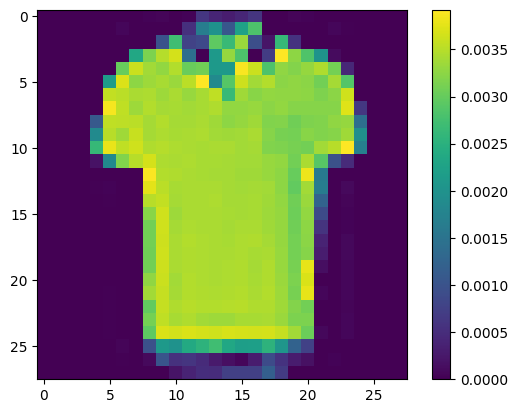

In [24]:
fig, ax = plt.subplots()
ax.imshow(X_test[0])
plt.colorbar(ax.imshow(X_train[0]), ax=ax)
ax.grid(False)
plt.show()

In [25]:
np.argmax(model.predict(X_test)[0])

375/375 [==============================] - 7s 17ms/step


0